### load derived data (json file) into pandas

- load data downloaded from WOS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jsonlines
import doi as doiLib

In [2]:
dataPath = "../data/derived2/"
dataFile = "records.jsonl"

In [3]:
#test = pd.read_json(path_or_buf=dataPath+dataFile,
#                   #orient="table",
#                   lines=True,
#                   #orient="columns",
#                   typ="series"
#                   )

index = 0

#initialData = pd.DataFrame()
data = {"WOSUID":[],
            "pubTitle":[],
            "pubYear":[],
            "pubType":[],
            "journalTitle":[],
            "publisher":[],
            "area":[],
            "areaCount":[],
            "identifier":[],
            "keywords":[],
            "abstract":[],
            "doi":[],
            "url":[],
            #"issn":[],
                   }
with jsonlines.open(dataPath+dataFile) as reader:   
    for obj in reader:
        if index<10000000:
            try:
                wosID = obj["record"]["UID"][4:]
            except KeyError:
                wosID = None
            data["WOSUID"].append(wosID)
            data["pubTitle"].append(obj["record"]["static_data"]["summary"]["titles"]["title"][-1]["content"])
            data["pubYear"].append(obj["record"]["static_data"]["summary"]["pub_info"]["pubyear"])
            data["pubType"].append(obj["record"]["static_data"]["summary"]["doctypes"]["doctype"])
            data["journalTitle"].append(obj["record"]["static_data"]["summary"]["titles"]["title"][0]["content"])
                
            try:
                publisher = obj["record"]["static_data"]["summary"]["publishers"]["publisher"]["names"]["name"]["unified_name"]
            except KeyError:
                publisher = None
                
            data["publisher"].append(publisher)
            try:
                areaCount = obj["record"]["static_data"]["fullrecord_metadata"]["category_info"]["subheadings"]["count"]
                
            except KeyError:
                areaCount = None
            data["areaCount"].append(areaCount)
            
            try:
                area = obj["record"]["static_data"]["fullrecord_metadata"]["category_info"]["subheadings"]["subheading"]
                
            except KeyError:
                area = None
            data["area"].append(area)
            
            data["identifier"].append(obj["record"]["dynamic_data"]["cluster_related"]["identifiers"]["identifier"])
            
            try:
                keyword = obj["record"]["static_data"]["fullrecord_metadata"]["keywords"]["keyword"]
            except KeyError:
                keyword = None
            data["keywords"].append(keyword)

            try:
                abstract = obj["record"]["static_data"]["fullrecord_metadata"]["abstracts"]["abstract"]["abstract_text"]["p"]
            except KeyError:
                abstract = None
            
            data["abstract"].append(abstract)
            

            #doi = None
            #url = None
            #print(index)
            for item in obj["record"]["dynamic_data"]["cluster_related"]["identifiers"]["identifier"]:
                try:
                    if item["type"]=="doi" or item["type"]=="xref_doi":    
                        doi = item["value"]
                except TypeError:
                    doi=None
            data["doi"].append(doi)

            try:
                url = doiLib.get_real_url_from_doi(doi)
            
            except ValueError:
                url=None

            data["url"].append(url)

            
        index=index+1


In [4]:
df = pd.DataFrame.from_dict(data)
#df
articles = df[df["pubType"]=="Article"]


In [5]:
for key in data.keys():
    print(len(data[key]))

2601
2601
2601
2601
2601
2601
2601
2601
2601
2601
2601
2601
2601


In [8]:
articles.to_json(dataPath+"articles.json")

In [9]:
url = doiLib.get_real_url_from_doi(doi)

ValueError: HTTP 404: DOI not found

'http://ieeexplore.ieee.org/document/4484546/'

<AxesSubplot:xlabel='pubYear', ylabel='Count'>

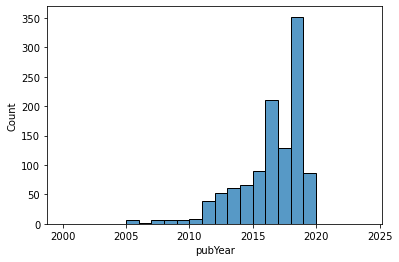

In [20]:
sns.histplot(articles["pubYear"],bins=list(range(2000,2025)))

In [16]:
#identifier
#obj["record"]["dynamic_data"]["cluster_related"]["identifiers"]["identifier"]

#WOSID 
#obj["record"]["UID"][4:]

#'find if this is an article
#obj["record"]["static_data"]["summary"]["doctypes"]["doctype"]

#find publication title
#obj["record"]["static_data"]["summary"]["titles"]["title"][-1]["content"]

#find journal title
#obj["record"]["static_data"]["summary"]["titles"]["title"][0]["content"]

#find publisher (elsevier, nature, etc)
#obj["record"]["static_data"]["summary"]["publishers"]["publisher"]["names"]["name"]["unified_name"]

#get publication year
#obj["record"]["static_data"]["summary"]["pub_info"]["pubyear"]

#find area (still requires more code to systematically extract all categories)
#obj["record"]["static_data"]["fullrecord_metadata"]["category_info"]["subheadings"]

### plot for the paper:
- number of papers in OSH over years
  - divide them per area (using research areas tags)
    - Engineering, life sciences, humanities?
- quality of the papers - how many fit the OSHWA OSH classification?
- Accessibility of the papers - how many are OA?